In [9]:
#the overall setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

RAW_PATH = "../raw/sierraleone-bumbuna.csv"
df = pd.read_csv(RAW_PATH, parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

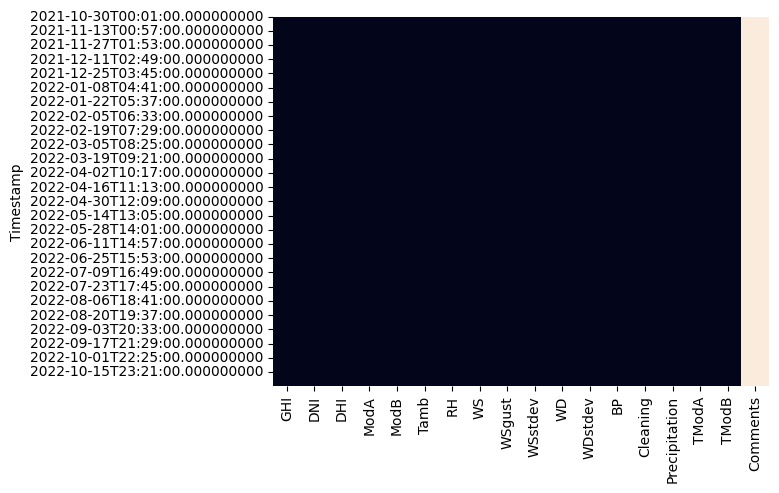

In [10]:
#summary stastics and the missing values
print(df.describe())
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
print(missing)
print(missing_pct[missing_pct > 5])
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
#outlier detections
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
    df[col] = df[col].clip(lower=0)
for col in key_cols:
    df[col] = df[col].fillna(df[col].median())
z_scores = np.abs(stats.zscore(df[key_cols]))
outliers = (z_scores > 3).any(axis=1)
print(outliers.sum())
df_clean = df[~outliers].copy()
df_clean.to_csv('../data/benin_clean.csv')

16547


d:\Backup folder\OneDrive\Desktop\KAIM_WEEK_1\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


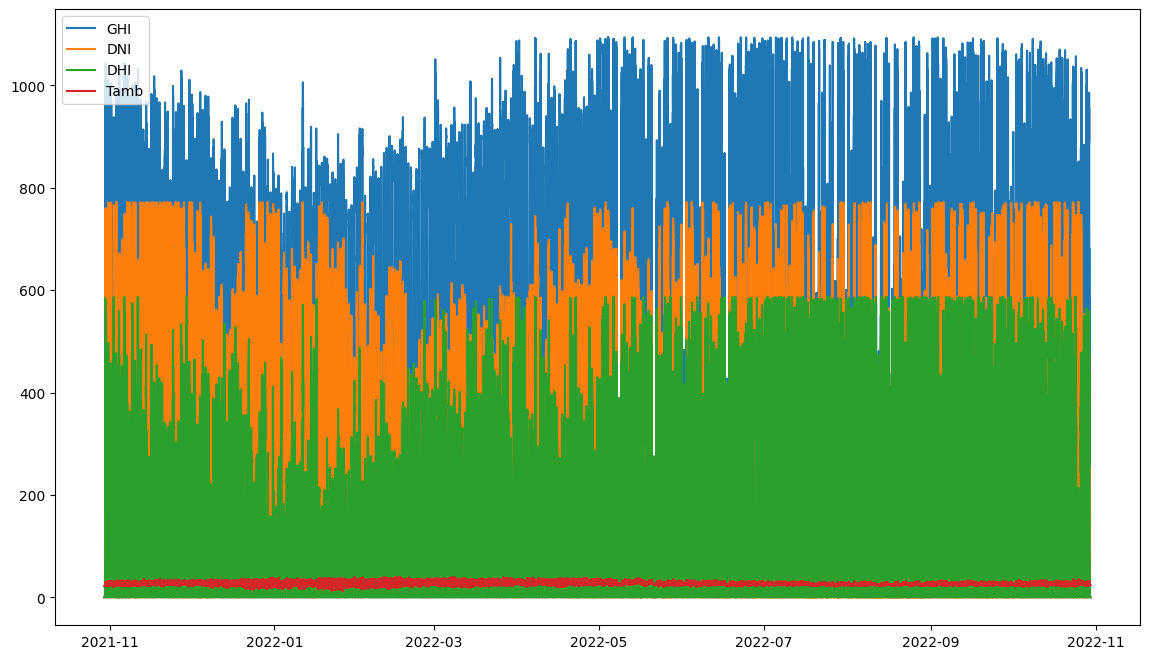

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_22964\3388037016.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_clean.resample('M').mean()[['GHI', 'DNI', 'DHI', 'Tamb']].plot.bar()


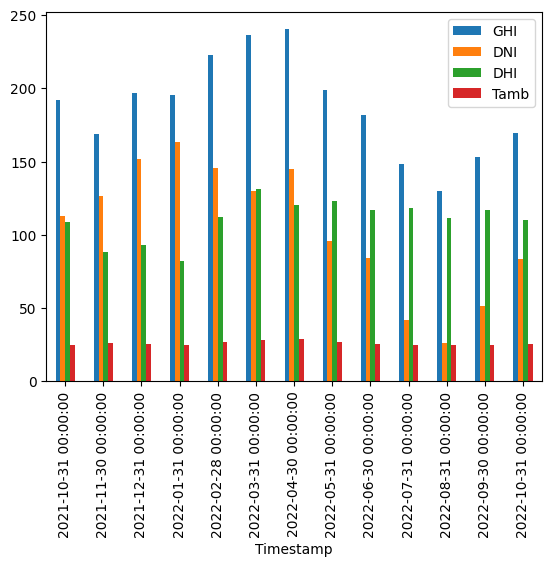

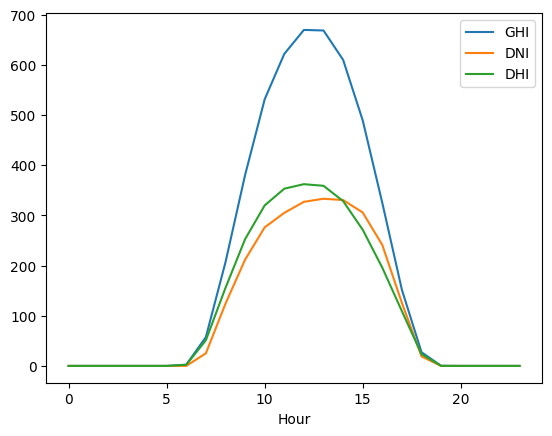

In [12]:
#Time series analysis
plt.figure(figsize=(14,8))
plt.plot(df_clean['GHI'], label='GHI')
plt.plot(df_clean['DNI'], label='DNI')
plt.plot(df_clean['DHI'], label='DHI')
plt.plot(df_clean['Tamb'], label='Tamb')
plt.legend()
plt.show()
monthly = df_clean.resample('M').mean()[['GHI', 'DNI', 'DHI', 'Tamb']].plot.bar()
plt.show()
df_clean['Hour'] = df_clean.index.hour
hourly = df_clean.groupby('Hour').mean()[['GHI', 'DNI', 'DHI']].plot()
plt.show()

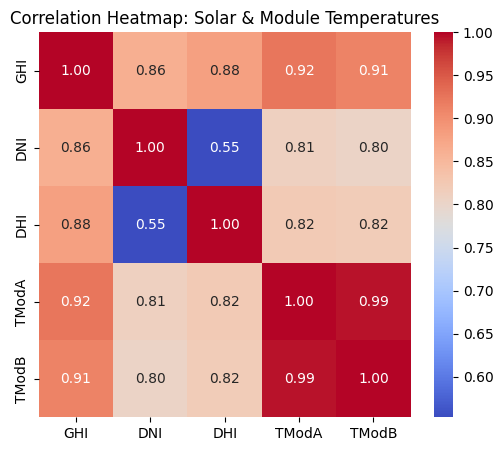

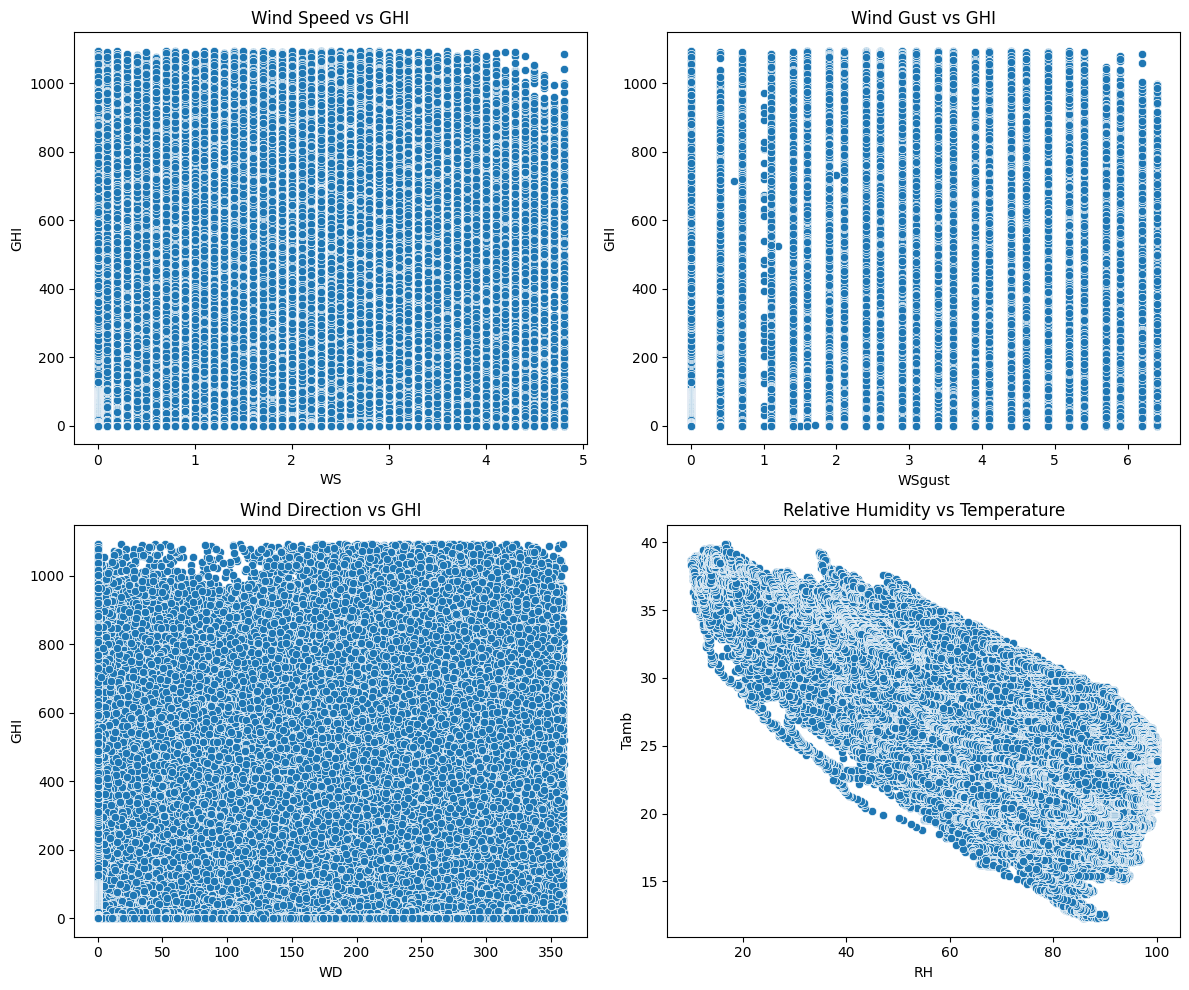

In [14]:
# Correlation & Relationship Analysis
corr = df_clean[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar & Module Temperatures")
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df_clean, x='WS', y='GHI', ax=axs[0, 0])
axs[0, 0].set_title('Wind Speed vs GHI')

sns.scatterplot(data=df_clean, x='WSgust', y='GHI', ax=axs[0, 1])
axs[0, 1].set_title('Wind Gust vs GHI')
sns.scatterplot(data=df_clean, x='WD', y='GHI', ax=axs[1, 0])
axs[1, 0].set_title('Wind Direction vs GHI')

sns.scatterplot(data=df_clean, x='RH', y='Tamb', ax=axs[1, 1])
axs[1, 1].set_title('Relative Humidity vs Temperature')

plt.tight_layout()
plt.show()

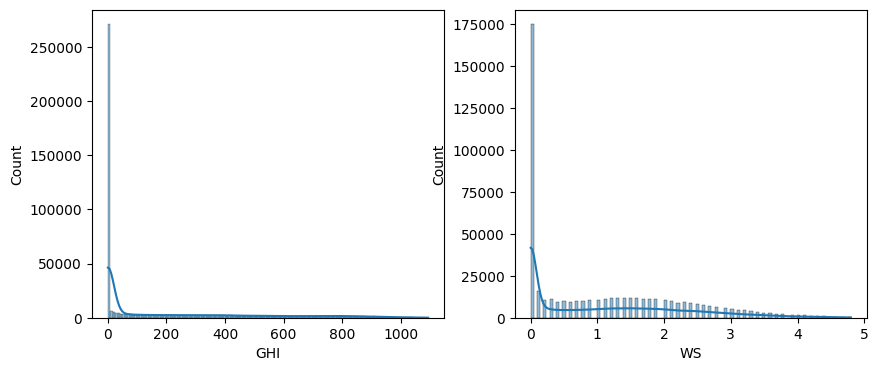

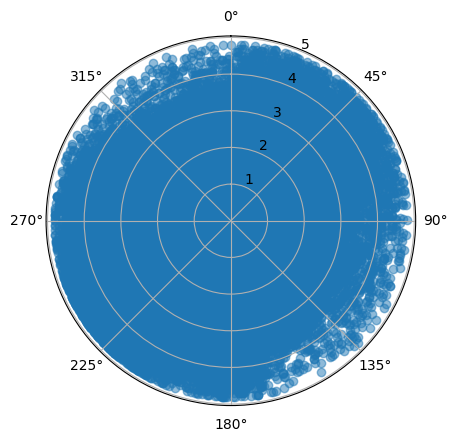

In [15]:
# Wind & Distribution Analysis
fig, axs = plt.subplots(1,2,figsize=(10,4))
sns.histplot(df_clean['GHI'], kde=True, ax=axs[0])
sns.histplot(df_clean['WS'], kde=True, ax=axs[1])
plt.show()
ax = plt.subplot(111, polar=True)
ax.scatter(np.deg2rad(df_clean['WD']), df_clean['WS'], alpha=0.5)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

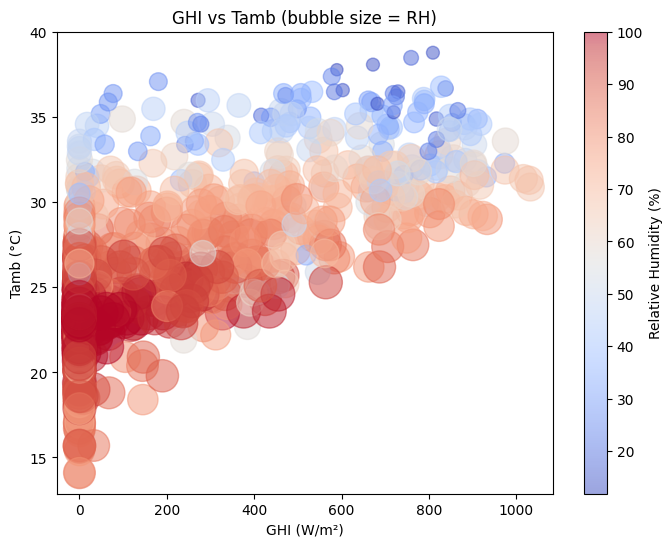

In [16]:
#Bubble chart analsis
if {'GHI','Tamb','RH'}.issubset(df_clean.columns):
    sample = df_clean.sample(min(1000, len(df_clean))).dropna(subset=['GHI','Tamb','RH'])
    plt.figure(figsize=(8,6))
    plt.scatter(sample['GHI'], sample['Tamb'], s=(sample['RH']+1)*6, alpha=0.5,
                c=sample['RH'], cmap='coolwarm')
    plt.xlabel('GHI (W/m²)')
    plt.ylabel('Tamb (°C)')
    plt.title('GHI vs Tamb (bubble size = RH)')
    plt.colorbar(label='Relative Humidity (%)')
    plt.show()